# Association Rules

Let $X$ be a vector in p-dimensionl space. The goal of the association rule analysis is to find a collection of $X$'s, say $v_1, v_2, ..., v_L$ such that $P(v_l)$ is high. This could be esitimated by a simple frequency; however, this does not work for large p.

Instead we seek regions in the space with high probability content relative to their size or support. Let $S_j = \{ all possible values of x_j \}$, and let $s_j \subset S_j$. Then we want to find $s_1, ..., s_p$ such that $$P \left[ \bigcap^p_{j=1} (X_j \in s_j ) \right] $$ is relatively large. If $s_j=S_j$ then we can just ignore it.

### Market Basket Analysis

* Either $|s_j|=1$ or $s_j = S_J$. Then we want to find the subsets of $J \subset \{1, ...,p\}$, and corresponding values $v_{0j}, j \in J$  such that $$P \left[ \bigcap_{j \in J} (X_j = v_{0j} ) \right]$$ is large. 

* The above can be coded using dummy variables in the following matter. We introduce a new set $Z_1, ..., Z_K$ (each Z is 1-dimensaional), where $Z_i =1$ if the corresponding value in X takes on that value. Then the number of dummy variables K is $$K = \sum_{j=1}^p |S_j|$$

* Then we want to find the subset of the intergeres $ \mathbb{K} = \{1,..., K\}$ such that $$P \left[ \bigcap_{k \in \mathbb{K}} (Z_k = 1 ) \right]   = P \left[ \prod_{k \in \mathbb{K}} (Z_k = 1 )  \right]$$ is large.

* $\mathbb{K} $ is called the item set and the number of variables $Z_k$ in the item set is called its size

* The estimate is $$ \hat{P} \left[ \prod_{k \in \mathbb{K}} (Z_k = 1) \right]  = \frac{1}{N} \sum_{i=1}^N \prod_{k \in \mathbb{K}} z_{ik} $$, where $z_{ik}$ is the value of $Z_k$ for the ith case. This is called the support or prevalence, $T(\mathbb{k})$, of the item set. 

* In association rule mining a lower support bound t is speciified and we seek all items such that $T(\mathbb{K}) > t$

* Some terms 
    * If $ \mathbb{K}= \{a,b,c \}$and we have the rule $ \{a, b \} \rightarrow \{c\}$. Then the $\textbf{support value}$ is the percentage of observations that had $ \{a,b,c \}$ of the market basekets. $ \textbf{Confidence} = \frac{\#\{a,b,c \}}{\#\{c \}}$
    
 * Want to find assiciation rules that have high support and confidence

### The Apriori Algorithm

A algorithm for Market Basket Analysis. Works as follows:
1. choose a support value, s, and a confidence, c
2. start with subsets size, 1. Calculate the support of these subsets and keep if larger than s
3. increase size by 1. Then get all subsets of size s, and keep those in which all the subsets of size s-1 are in the subset frm step 2
4. calculate the confidence of all antecedent/consequent possibilities and keep those that are larger than c
5. go back to step 3 and repeat until can not create anymore subsets

### Example

for confidence only calcualted the antecedent of one size smaller

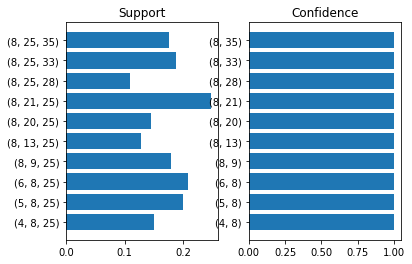

In [11]:
# The Apriori Algorithm
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

def getDate():
    marketingData = pd.read_csv("C:\\Users\\Ruedi\\OneDrive\\Learning\\Learning\\Machine Learning(python)\\Unsupervised Learning\\Marketing.csv"  )
    marketingData =marketingData.dropna( axis = 0 )
    n = marketingData.shape[0]
    
    col =  marketingData.loc[ :,  ["ANNUAL INCOME" ]]
    incomeDf = pd.DataFrame(  { \
                                    "Income: Less than $10,000"  : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "Income: $10,000 to $14,999" : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "Income: $15,000 to $19,999" : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "Income: $20,000 to $24,999" : np.where( col == 4, 1, 0 ).flatten(),  \
                                    "Income: $25,000 to $29,999" : np.where( col == 5, 1, 0 ).flatten(),  \
                                    "Income: $30,000 to $39,999" : np.where( col == 6, 1, 0 ).flatten(),  \
                                    "Income: $40,000 to $49,999" : np.where( col == 7, 1, 0 ).flatten(),  \
                                    "Income: $50,000 to $74,999" : np.where( col == 8, 1, 0 ).flatten(),  \
                                    "Income: $75,000 or more"    : np.where( col == 9, 1, 0 ).flatten() \
                            }   )

    col =  marketingData.loc[ :,  ["SEX" ]]
    sexDf = pd.DataFrame( { \
                                "Male"   : np.where( col == 1, 1, 0 ).flatten(), \
                                "Female" : np.where( col == 2, 1, 0 ).flatten() \
                        } )


    col =  marketingData.loc[ :,  ["MARITAL STATUS" ]]
    MARITALDf = pd.DataFrame(  { \
                                    "MARITAL: Married"                      : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "MARITAL: Living together, not married" : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "MARITAL: Divorced or separated"        : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "MARITAL: Widowed"                      : np.where( col == 4, 1, 0 ).flatten(),  \
                                    "MARITAL: Single, never married"        : np.where( col == 5, 1, 0 ).flatten() \
                            }   )


    col =  marketingData.loc[ :,  ["AGE" ]]
    ageDf = pd.DataFrame(  { \
                                    "AGE: 14 thru 17" : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "AGE: 18 thru 24" : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "AGE: 25 thru 34" : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "AGE: 35 thru 44" : np.where( col == 4, 1, 0 ).flatten(),  \
                                    "AGE: 45 thru 54" : np.where( col == 5, 1, 0 ).flatten(),  \
                                    "AGE: 55 thru 64" : np.where( col == 6, 1, 0 ).flatten(),  \
                                    "AGE:65 and Over" : np.where( col == 7, 1, 0 ).flatten() \
                            }   )

    col =  marketingData.loc[ :,  ["EDUCATION" ]]
    educationDf = pd.DataFrame(  { \
                                    "EDUCATION: Grade 8 or less"        : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "EDUCATION: Grades 9 to 11"         : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "EDUCATION: Graduated high school"  : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "EDUCATION: 1 to 3 years of college": np.where( col == 4, 1, 0 ).flatten(),  \
                                    "EDUCATION: College graduate"       : np.where( col == 5, 1, 0 ).flatten(),  \
                                    "EDUCATION: Grad Study"             : np.where( col == 6, 1, 0 ).flatten()  \
                            }   )

    col =  marketingData.loc[ :,  ["OCCUPATION" ]]
    occipationDf = pd.DataFrame(  { \
                                    "OCCUPATION: Professional/Managerial"        : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "OCCUPATION: Sales Worker"                   : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "OCCUPATION: Factory Worker/Laborer/Driver"  : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "OCCUPATION: Clerical/Service Worker"        : np.where( col == 4, 1, 0 ).flatten(),  \
                                    "OCCUPATION: Homemaker"                      : np.where( col == 5, 1, 0 ).flatten(),  \
                                    "OCCUPATION: Student, HS or College"         : np.where( col == 6, 1, 0 ).flatten(),  \
                                    "OCCUPATION: Military"                       : np.where( col == 7, 1, 0 ).flatten(),  \
                                    "OCCUPATION: Retired"                        : np.where( col == 8, 1, 0 ).flatten(),  \
                                    "OCCUPATION: Unemployed"                     : np.where( col == 9, 1, 0 ).flatten()  \
                            }   )

    col =  marketingData.loc[ :,  ["Lived Here how long" ]]
    LivedDf = pd.DataFrame(  { \
                                    "LIVED: Less than one year"     : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "LIVED: One to three years"     : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "LIVED: Four to six years"      : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "LIVED: Seven to ten years"     : np.where( col == 4, 1, 0 ).flatten(),  \
                                    "LIVED: More than ten years"    : np.where( col == 5, 1, 0 ).flatten() \
                            }   )


    col =  marketingData.loc[ :,  ["DUAL INCOMES"] ]
    dualDf = pd.DataFrame(  { \
                                    "DUAL: Not Married"     : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "DUAL: Yes"             : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "DUAL: Nos"             : np.where( col == 3, 1, 0 ).flatten() \
                            }   )


    col =  marketingData.loc[ :,  ["PERSONS IN YOUR HOUSEHOLD" ]]
    houseHoldSizeDf = pd.DataFrame(  { \
                                    "HOUSEHOLD SIZE: One"           : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE: Two"           : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE: Three"         : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE: Four"          : np.where( col == 4, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE: Five"          : np.where( col == 5, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE: Six"           : np.where( col == 6, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE: Seven"         : np.where( col == 7, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE: Eight"         : np.where( col == 8, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE: Nine or more"  : np.where( col == 9, 1, 0 ).flatten()  \
                            }   )

    col =  marketingData.loc[ :,  ["PERSONS IN HOUSEHOLD UNDER 18" ]]
    houseHoldSizeUnder18Df = pd.DataFrame(  { \
                                    "HOUSEHOLD SIZE 18: One"           : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE 18: Two"           : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE 18: Three"         : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE 18: Four"          : np.where( col == 4, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE 18: Five"          : np.where( col == 5, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE 18: Six"           : np.where( col == 6, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE 18: Seven"         : np.where( col == 7, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE 18: Eight"         : np.where( col == 8, 1, 0 ).flatten(),  \
                                    "HOUSEHOLD SIZE 18: Nine or more"  : np.where( col == 9, 1, 0 ).flatten()  \
                            }   )

    col =  marketingData.loc[ :,  ["HOUSEHOLDER STATUS"] ]
    houseHolderDf = pd.DataFrame(  { \
                                    "HOUSEHOLDER: Own"                          : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "HOUSEHOLDER: Rent"                         : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "HOUSEHOLDER: Live with Parents/Family"     : np.where( col == 3, 1, 0 ).flatten() \
                            }   )


    col =  marketingData.loc[ :,  ["TYPE OF HOME" ]]
    HomeTypeDf = pd.DataFrame(  { \
                                    "HOME_TYPE: House"          : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "HOME_TYPE: Condominium"    : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "HOME_TYPE: Apartment"      : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "HOME_TYPE: Mobile Home"    : np.where( col == 4, 1, 0 ).flatten(),  \
                                    "HOME_TYPE: Other"          : np.where( col == 5, 1, 0 ).flatten() \
                            }   )


    col =  marketingData.loc[ :,  ["ETHNIC CLASSIFICATION" ]]
    EthniceDf = pd.DataFrame(  { \
                                    "ETHNIC: American Indian"   : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "ETHNIC: Asian"             : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "ETHNIC: Black"             : np.where( col == 3, 1, 0 ).flatten(),  \
                                    "ETHNIC: East Indian"       : np.where( col == 4, 1, 0 ).flatten(),  \
                                    "ETHNIC: Hispanic"          : np.where( col == 5, 1, 0 ).flatten(),  \
                                    "ETHNIC: Pacific Islander"  : np.where( col == 6, 1, 0 ).flatten(),  \
                                    "ETHNIC: White"             : np.where( col == 7, 1, 0 ).flatten(),  \
                                    "ETHNIC: Other"             : np.where( col == 8, 1, 0 ).flatten() \
                            }   )

    col =  marketingData.loc[ :,  ["WHAT LANGUAGE IS SPOKEN MOST OFTEN IN YOUR HOME?"] ]
    languageDf = pd.DataFrame(  { \
                                    "LANGUAGE: English"     : np.where( col == 1, 1, 0 ).flatten(),  \
                                    "LANGUAGE: Spanish"     : np.where( col == 2, 1, 0 ).flatten(),  \
                                    "LANGUAGE: OtherNos"    : np.where( col == 3, 1, 0 ).flatten() \
                            }   )

    return( pd.concat( [incomeDf, sexDf, MARITALDf, ageDf, educationDf, occipationDf, LivedDf, dualDf, houseHoldSizeDf, houseHoldSizeUnder18Df, houseHolderDf, HomeTypeDf, EthniceDf, languageDf ], axis = 1  ) )


marketingData = getDate()
support = 0.10
confidence = 0.7
# get single-item sets
x = (marketingData.mean( axis = 0) >= support)
marketingData = marketingData.loc[ : , x ]

# gets the rest of the item sets
k = marketingData.shape[1]
K = { "size 1": list( range(0,k)) }
size = 2
largestGroupSize = k
Association = []
while largestGroupSize > 0:

    if size == 2:
        temp = []
        for i in range(k):
            temp.append(i)
        newGroupings =   list( combinations( temp , size) ) 

    else:
        newGroupings = []
        for group in largestSizeGroupings:
            for i in range(k):
                if i not in group:
                    t = list(group + (i, ))
                    t.sort()
                    t = tuple(t)
                    if t not in newGroupings:
                        if len( set( list( combinations( t , size-1) ) ) - set( largestSizeGroupings ) ) == 0:
                            newGroupings.append( t )
 
    largestSizeGroupings = []
    for group in newGroupings:
        if np.mean(  marketingData.iloc[ :,  list(group) ].sum( axis = 1)  == size ) >= support:
            largestSizeGroupings.append( group )


    largestGroupSize = len(largestSizeGroupings)
    
    if largestGroupSize > 0:
        K["size "+str(size)] = largestSizeGroupings
        if size > 2:
            for group in largestSizeGroupings:
                subset = list( combinations( group , size-1) )
                for subGroup in subset:
                    c =  (np.sum((marketingData.iloc[ :,  list(group) ].sum( axis = 1)  == size)) /  np.sum((marketingData.iloc[ :,  list(subGroup) ].sum( axis = 1)  == size -1)))
                    if c  > confidence :
                        Association.append( { "confidence" : c, 'antecedent' : tuple( subGroup ), 'consequent' : group, 'support' :  np.mean(  marketingData.iloc[ :,  list(group) ].sum( axis = 1)  == size )  } )

    size += 1

Association = sorted( Association, key = lambda k: k["confidence"], reverse=True)[0:10]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.barh(  np.arange(10),    list( map( lambda d: d["support"], Association )),  tick_label = list( map( lambda d: str( d["consequent"]), Association ))  )
ax1.set_title("Support")
ax2.barh(  np.arange(10),    list( map( lambda d: d["confidence"], Association )),  tick_label = list( map( lambda d: str( d["antecedent"]), Association ))  )
ax2.set_title("Confidence")
plt.show()



In [16]:
# index names
names = list(marketingData.columns.values)
for i in range(len(names)):
    print(i,": ", names[i])

0 :  Income: $30,000 to $39,999
1 :  Income: $40,000 to $49,999
2 :  Income: $50,000 to $74,999
3 :  Income: $75,000 or more
4 :  Income: Less than $10,000
5 :  Female
6 :  Male
7 :  MARITAL: Married
8 :  MARITAL: Single, never married
9 :  AGE: 18 thru 24
10 :  AGE: 25 thru 34
11 :  AGE: 35 thru 44
12 :  AGE: 45 thru 54
13 :  EDUCATION: 1 to 3 years of college
14 :  EDUCATION: College graduate
15 :  EDUCATION: Grad Study
16 :  EDUCATION: Grades 9 to 11
17 :  EDUCATION: Graduated high school
18 :  OCCUPATION: Clerical/Service Worker
19 :  OCCUPATION: Professional/Managerial
20 :  OCCUPATION: Student, HS or College
21 :  LIVED: More than ten years
22 :  LIVED: One to three years
23 :  LIVED: Seven to ten years
24 :  DUAL: Nos
25 :  DUAL: Not Married
26 :  DUAL: Yes
27 :  HOUSEHOLD SIZE: Four
28 :  HOUSEHOLD SIZE: One
29 :  HOUSEHOLD SIZE: Three
30 :  HOUSEHOLD SIZE: Two
31 :  HOUSEHOLD SIZE 18: One
32 :  HOUSEHOLD SIZE 18: Two
33 :  HOUSEHOLDER: Live with Parents/Family
34 :  HOUSEHOLDE